In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1:

In [35]:
data =pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [36]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
# Check the structure of the dataset
print("Dataset structure:")
print(data.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF            

In [38]:
# Verify if missing values are imputed
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# Step 2: Exploratory Data Analysis (EDA):

In [41]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


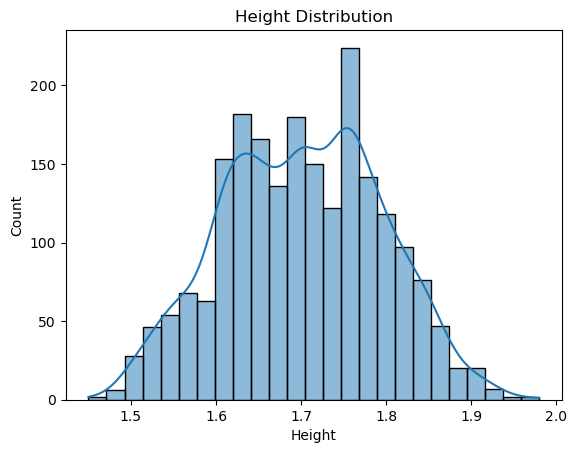

C:\Users\Amna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


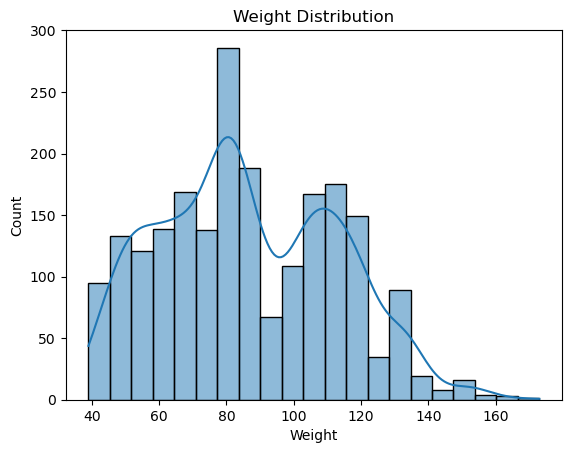

In [42]:

# 1. Height and Weight Distribution
sns.histplot(data=data, x='Height', kde=True)
plt.title("Height Distribution")
plt.show()

sns.histplot(data=data, x='Weight', kde=True)
plt.title("Weight Distribution")
plt.show()


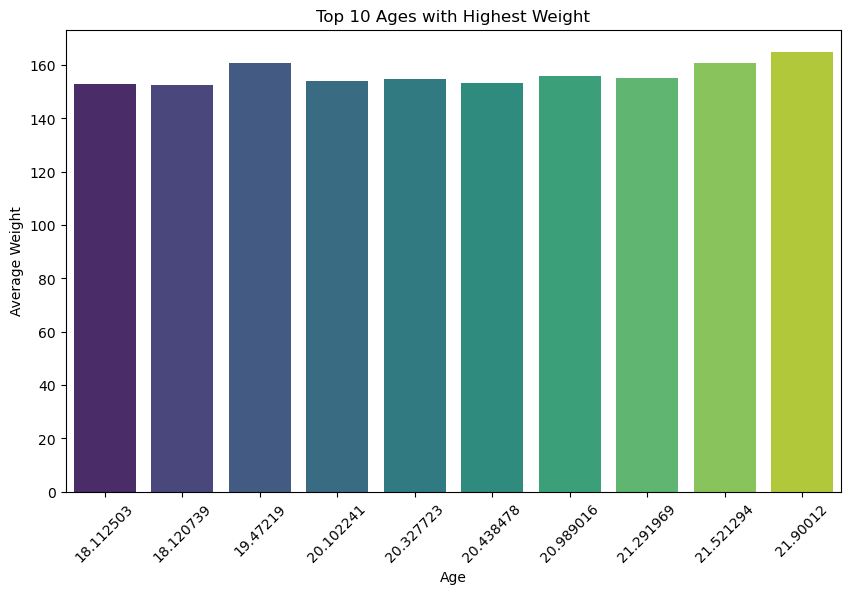

In [46]:
# 2. Top 10 Ages with Highest Weight
top_10_weight_ages = data.groupby('Age')['Weight'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_weight_ages.index, y=top_10_weight_ages.values, palette='viridis')
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()

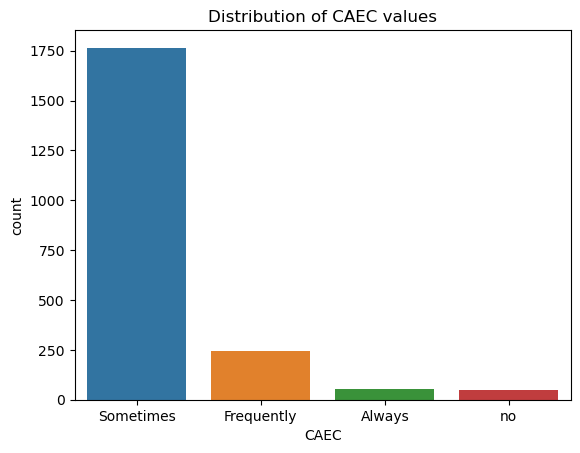

In [44]:

# 3. Distribution of CAEC values
sns.countplot(data=data, x='CAEC')
plt.title("Distribution of CAEC values")
plt.show()


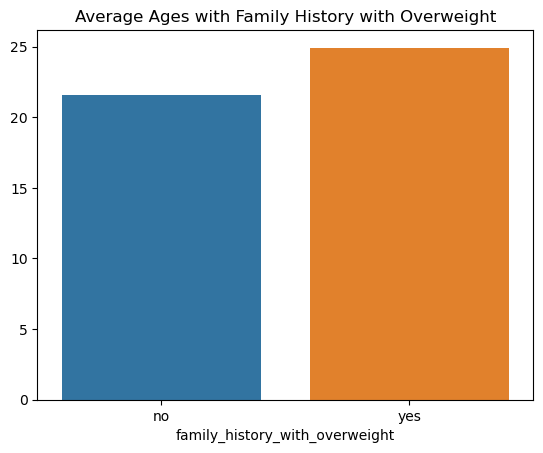

In [45]:
# 4. Average Ages with Family History with Overweight
avg_ages = data.groupby('family_history_with_overweight')['Age'].mean()
sns.barplot(x=avg_ages.index, y=avg_ages.values)
plt.title("Average Ages with Family History with Overweight")
plt.show()


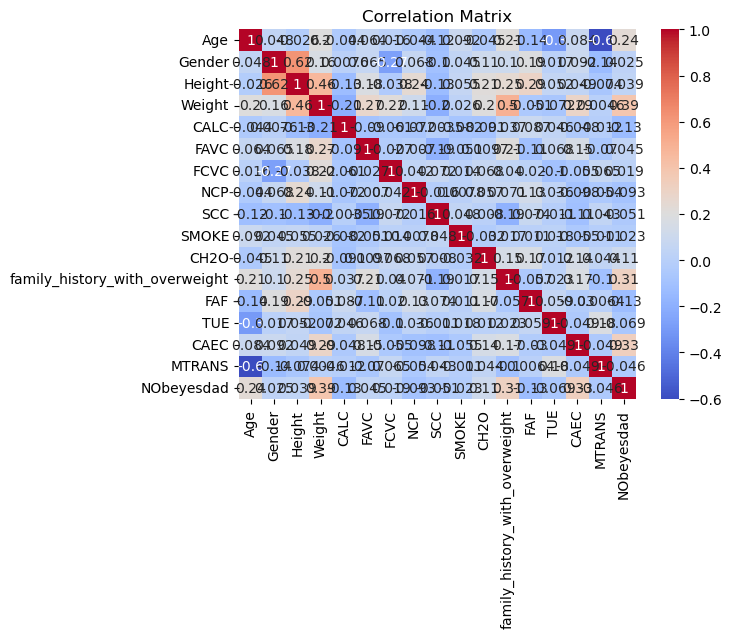

In [49]:

#5. Correlation matrix
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns before computing correlation matrix
encoded_data = data.copy()
label_encoder = LabelEncoder()
for column in encoded_data.columns:
    if encoded_data[column].dtype == 'object':
        encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

# Compute correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 3: Data Preprocessing:

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
# Replace "your_dataset.csv" with the actual file name
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Check for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle categorical columns (e.g., using label encoding)
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Check for missing values and handle them if necessary
missing_values = data.isnull().sum()
print("Missing values:", missing_values)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Non-numeric columns: Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Missing values: Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# Step 4:


The 'NObeyesdad' column likely represents the level of obesity, which seems to be categorical in nature (e.g., 'Normal_Weight', 'Overweight_Level_I', etc.). Therefore, predicting 'NObeyesdad' is a classification problem rather than a regression problem.

For classification problems, several algorithms can be considered, including:

Logistic Regression, 
Decision Trees, 
Random Forest, 
Support Vector Machines (SVM), 
K-Nearest Neighbors (KNN), 
Gradient Boosting models (e.g., XGBoost, LightGBM)

# Step 5

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6548463356973995
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.53      0.42      0.47        62
           2       0.58      0.60      0.59        78
           3       0.82      0.84      0.83        58
           4       0.90      1.00      0.95        63
           5       0.54      0.38      0.44        56
           6       0.35      0.38      0.37        50

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.64       423
weighted avg       0.64      0.65      0.64       423

Confusion Matrix:
[[52  2  0  0  0  2  0]
 [17 26  4  1  1  6  7]
 [ 0  0 47  9  6  3 13]
 [ 0  0  3 49  0  0  6]
 [ 0  0  0  0 63  0  0]
 [ 1 14 11  0  0 21  9]
 [ 0  7 16  1  0  7 19]]


C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
